# Replicating a famous gif

There is this chart from [Alec Radford](https://twitter.com/alecrad) that became quite famous for showing a comparative run between different optimizers.

![image.png](https://cs231n.github.io/assets/nn3/opt1.gif)

Let's try replicating it ourselves. We will use the framework developed in our [previous post](http://www.clungu.com/Optimisation-playground/) for this. 

Since this gif is 4 years old now, I'll also add a few additional optimizers for comparision.

It looks almost the same! I wasn't actualy able to find the exact setup used for generating the gif (the initial starting point, and the learning rates used on all the optimizers) but I did a best effort approach on finding these and I thing  my results replicate the behavior shown in the original image.

Since we're here, let's play arround and learn how these optimizers behave in different settings!

## Loading the playground

All code on this blog is released under the following licence.

```
# Copyright 2020 Cristian Lungu
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
```

### The test functions

In [38]:
import numpy as np
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import matplotlib.colors as colors

import jax.numpy as jnp


class Ifunction:
    def __init__(self):
        pass 

    def __call__(*args) -> np.ndarray:
        pass

    def min(self) -> np.ndarray:
        """
        Returns a np.array of the shape (k, 3) with all the minimum k points of this function. 
        The two values of the second dimension are the (x,y,z) coordinates of the minimum values 
        """
        return self.coord(self._min())

    def coord(self, points: np.ndarray) -> np.ndarray:
        """
        Returns a np.array of the shape (k, 3) with all the evaluations of the given
        k points of this function. 
        The three values of the second dimension are the (x,y,z) coordinates of the minimum values 
        """
        z = np.expand_dims(self(points[:, 0], points[:, 1]), axis=-1)
        return np.hstack((
            points,
            z
        ))

    def domain(self) -> np.ndarray:
        """
        Returns the ((x_min, x_max), (y_min, y_max)) values where this function 
        is of most interest
        """
        pass


# =========================
# Function implementations
# =========================

class himmelblau(Ifunction):
    def __call__(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Computes the given function
        """
        return (x**2+y-11)**2 + (x+y**2-7)**2
    
    def _min(self) -> np.ndarray:
        """
        Returns a np.array of the shape (k, 2) with all the minimum k points of this function. 
        The two values of the second dimension are the (x,y) coordinates of the minimum values 
        """
        return np.array([
            [3.0, 2.0],
            [-2.805118, 3.131312],
            [-3.779310, -3.283186],
            [3.584428, -1.848126]
        ])

    def domain(self) -> np.ndarray:
        """
        Returns the ((x_min, x_max), (y_min, y_max)) values where this function 
        is of most interest
        """
        return np.array([
            [-5, 5],
            [-5, 5]
        ])


class mc_cormick(Ifunction):
    def __call__(self, x: jnp.ndarray, y: jnp.ndarray) -> np.ndarray:
        """
        Computes the given function
        """
        return jnp.sin(x+y) + (x-y)**2-1.5*x+2.5*y+1
    
    def _min(self) -> np.ndarray:
        """
        Returns a np.array of the shape (k, 2) with all the minimum k points of this function. 
        The two values of the second dimension are the (x,y) coordinates of the minimum values 
        """
        return np.array([
            [-0.54719, -1.54719],
        ])

    def domain(self) -> np.ndarray:
        """
        Returns the ((x_min, x_max), (y_min, y_max)) values where this function 
        is of most interest
        """
        return np.array([
            [-1.5, 4],
            [-3, 4]
        ])


class holder_table(Ifunction):
    def __call__(self, x: jnp.ndarray, y: jnp.ndarray) -> np.ndarray:
        """
        Computes the given function
        """
        return -jnp.abs(jnp.sin(x)*jnp.cos(y)*jnp.exp(jnp.abs(1-jnp.sqrt(x**2+y**2)/jnp.pi)))
    
    def _min(self) -> np.ndarray:
        """
        Returns a np.array of the shape (k, 2) with all the minimum k points of this function. 
        The two values of the second dimension are the (x,y) coordinates of the minimum values 
        """
        return np.array([
            [8.05502, 9.66459],
            [8.05502, -9.66459],
            [-8.05502, 9.66459],
            [-8.05502, -9.66459],
        ])

    def domain(self) -> np.ndarray:
        """
        Returns the ((x_min, x_max), (y_min, y_max)) values where this function 
        is of most interest
        """
        return np.array([
            [-10, 10],
            [-10, 10]
        ])

class beale(Ifunction):
    def __call__(self, x: jnp.ndarray, y: jnp.ndarray) -> np.ndarray:
        """
        Computes the given function
        """
        return (1.5-x+x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2
    
    def _min(self) -> np.ndarray:
        """
        Returns a np.array of the shape (k, 2) with all the minimum k points of this function. 
        The two values of the second dimension are the (x,y) coordinates of the minimum values 
        """
        return np.array([
            [3, 0.5],
        ])

    def domain(self) -> np.ndarray:
        """
        Returns the ((x_min, x_max), (y_min, y_max)) values where this function 
        is of most interest
        """
        return np.array([
            [-4, 4],
            [-4, 4]
        ])


class saddle_point(Ifunction):
    def __call__(self, x: jnp.ndarray, y: jnp.ndarray) -> np.ndarray:
        """
        Computes the given function
        """
        return x**2 - y**2
    
    def _min(self) -> np.ndarray:
        """
        Returns a np.array of the shape (k, 2) with all the minimum k points of this function. 
        The two values of the second dimension are the (x,y) coordinates of the minimum values 
        """
        return np.array([
            [3, 0.5],
        ])

    def domain(self) -> np.ndarray:
        """
        Returns the ((x_min, x_max), (y_min, y_max)) values where this function 
        is of most interest
        """
        return np.array([
            [-1.5, 1],
            [-1.5, 1]
        ])

class eggholder(Ifunction):
    def __call__(self, x: jnp.ndarray, y: jnp.ndarray) -> np.ndarray:
        """
        Computes the given function
        """
        return -(y+47)*jnp.sin(jnp.sqrt(jnp.abs(x/2+(y+47)))) - x*jnp.sin(jnp.sqrt(jnp.abs(x-(y+47))))
    
    def _min(self) -> np.ndarray:
        """
        Returns a np.array of the shape (k, 2) with all the minimum k points of this function. 
        The two values of the second dimension are the (x,y) coordinates of the minimum values 
        """
        return np.array([
            [512, 404.239],
        ])

    def domain(self) -> np.ndarray:
        """
        Returns the ((x_min, x_max), (y_min, y_max)) values where this function 
        is of most interest
        """
        return np.array([
            [-512, 512],
            [-512, 512]
        ])

# Let's collect all the functions implemented into a single datastructure.
Function = {clazz.__name__: clazz() for clazz in Ifunction.__subclasses__()}
Function

{'beale': <__main__.beale at 0x7f45b01016a0>,
 'eggholder': <__main__.eggholder at 0x7f45b0101710>,
 'himmelblau': <__main__.himmelblau at 0x7f45b01014a8>,
 'holder_table': <__main__.holder_table at 0x7f45b01015f8>,
 'mc_cormick': <__main__.mc_cormick at 0x7f45b0101588>,
 'saddle_point': <__main__.saddle_point at 0x7f45b01016d8>}

### The charting utils

(<Figure size 1872x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f45c6e37860>)

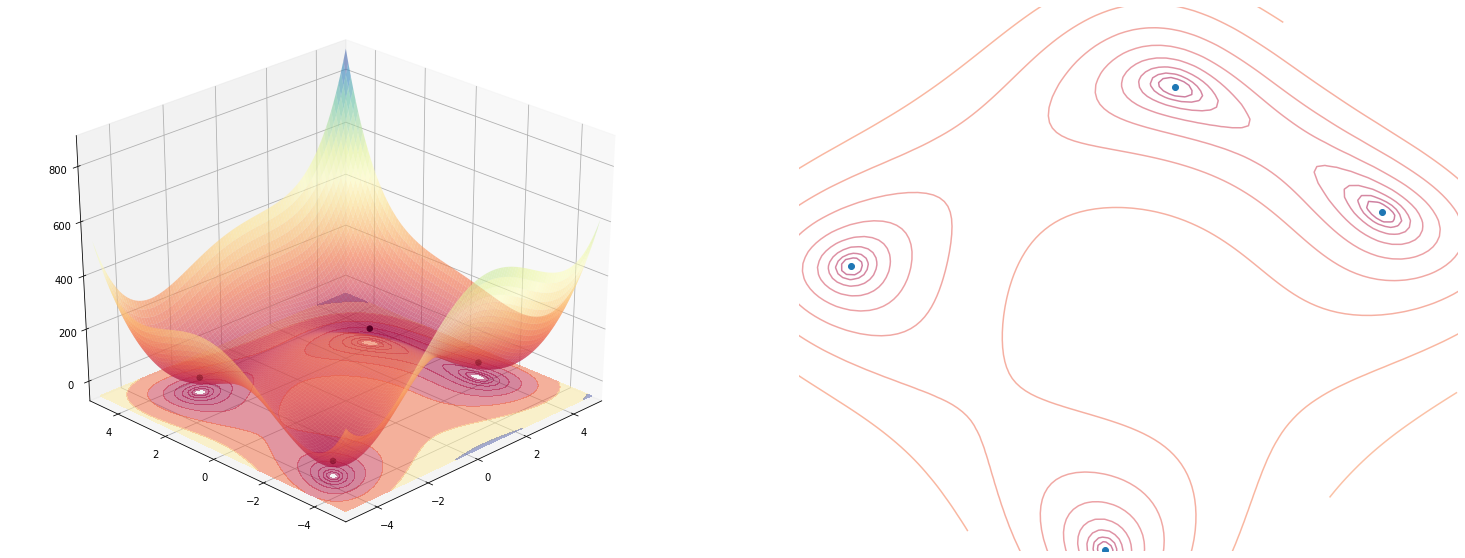

In [4]:
from typing import Tuple
from functools import lru_cache
from tqdm.notebook import tqdm

@lru_cache(maxsize=None)
def contour(function: Ifunction, x_min=-5, x_max=5, y_min=-5, y_max=5, mesh_size=100):
    """
    Returns a (x, y, z) 3D coordinates, where `z = function(x,y)` evaluated on a 
    mesh of size (mesh_size, mesh_size) generated from the linear space defined by 
    the boundaries returned by `function.domain()`.

    This function is usually used for displaying the contour of the diven function.
    """
    xx, yy = np.meshgrid( 
        np.linspace(x_min, x_max, num=mesh_size),
        np.linspace(y_min, y_max, num=mesh_size)
    )
    zz = function(xx, yy)
    return xx, yy, zz


def zoom(x_domain, y_domain, zoom_factor):
    (x_min, x_max), (y_min, y_max) = x_domain, y_domain

    # zoom
    x_mean = (x_min + x_max) / 2
    y_mean = (y_min + y_max) / 2

    x_min = x_min + (x_mean - x_min) * zoom_factor
    x_max = x_max - (x_max - x_mean) * zoom_factor

    y_min = y_min + (y_mean - y_min) * zoom_factor
    y_max = y_max - (y_max - y_mean) * zoom_factor

    return (x_min, x_max), (y_min, y_max)


def rotate(_x: np.ndarray, _y: np.ndarray, angle=45) -> Tuple[np.ndarray, np.ndarray]:
    def __is_mesh(x: np.ndarray) -> bool:
        __is_2d = len(x.shape) == 2
        if __is_2d:
            __is_repeated_on_axis_0 = np.allclose(x.mean(axis=0), x[0, :])
            __is_repeated_on_axis_1 = np.allclose(x.mean(axis=1), x[:, 0])
            __is_repeated_array = __is_repeated_on_axis_0 or __is_repeated_on_axis_1
            return __is_repeated_array
        else:
            return False

    def __is_single_dimension(x: np.ndarray) -> bool:
        # when the function only has one minimum the initial x will have the shape (1,)
        # and doing a np.squeeze before calling this function will result in a x of shape () 
        # when we reach this control point 
        _is_scalar_point = len(x.shape) == 0
        return len(x.shape) == 1 or _is_scalar_point

    def __rotate_mesh(xx: np.ndarray, yy: np.ndarray) -> np.ndarray:
        xx, yy = np.einsum('ij, mnj -> imn', rotation_matrix, np.dstack([xx, yy]))
        return xx, yy

    def __rotate_points(x: np.ndarray, y: np.ndarray) -> np.ndarray:
        points = np.hstack((x[:, np.newaxis], y[:, np.newaxis]))
        # anti-clockwise rotation matrix
        x, y = np.einsum('mi, ij -> jm',  points, np.array([
            [np.cos(radians), -np.sin(radians)],
            [np.sin(radians), np.cos(radians)]
        ]))
        return x, y

    # apply rotation
    angle = (angle + 90) % 360
    radians = angle * np.pi/180

    # clockwise rotation matrix
    rotation_matrix = np.array([
        [np.cos(radians), np.sin(radians)],
        [-np.sin(radians), np.cos(radians)]
    ])

    if __is_mesh(_x) and __is_mesh(_y):
        _x, _y = __rotate_mesh(_x, _y)
    elif __is_single_dimension(np.squeeze(_x)) and __is_single_dimension(np.squeeze(_y)):
        def __squeeze(_x):
            """
            We need to reduce the redundant 1 domensions from shapes like (3, 1, 2) to (3, 2), 
            but at the same time, making sure we don't end up with scalar values (going from (1, 1) to a shape ())

            We need at least a shape of (1,)
            """
            if len(np.squeeze(_x).shape) == 0:
                return np.array([np.squeeze(_x)])
            else:
                return np.squeeze(_x)

        _x, _y = __squeeze(_x), __squeeze(_y) 
        _x, _y = __rotate_points(_x, _y)
    else:
        raise AssertionError(f"Unknown rotation types for shapes {_x.shape} and {_y.shape}")
    return _x, _y

def log_contour_levels(zz, number_of_contour_lines=35):
    min_function_value = zz.min()   # we use the mesh values because some functions could actually go to -inf, we only need the minimum in the viewable window
    max_function_value = np.percentile(zz, 5) # min(5, zz.max()/2)

    contour_levels = min_function_value + np.logspace(0, max_function_value-min_function_value, number_of_contour_lines)
    return contour_levels

def plot_function_2d(function: Ifunction, ax=None, angle=45, zoom_factor=0, contour_log_scale=True):
    (x_min, x_max), (y_min, y_max) = zoom(*function.domain(), zoom_factor)

    xx, yy, zz = contour(function, x_min, x_max, y_min, y_max)

    ax = ax if ax else plt.gca()
    
    xx, yy = rotate(xx, yy, angle=angle)    # I wonder why I shoudn't also rotate zz?!

    contour_levels = log_contour_levels(zz) if contour_log_scale else 200
    contour_color_normalisation = colors.LogNorm(vmin=contour_levels.min(), vmax=contour_levels.max()) if contour_log_scale else colors.Normalize(vmin=zz.min(), vmax=zz.max())
    ax.contour(xx, yy, zz, levels=contour_levels, cmap='Spectral', norm=contour_color_normalisation, alpha=0.5)
    
    min_coords = function.min()
    ax.scatter(*rotate(min_coords[:, 0], min_coords[:, 1], angle=angle))
    ax.axis("off")

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)


def plot_function_3d(function: Ifunction, ax=None, azimuth=45, angle=45, zoom_factor=0, show_projections=False, contour_log_scale=True):    
    (x_min, x_max), (y_min, y_max) = zoom(*function.domain(), zoom_factor)

    xx, yy, zz = contour(function, x_min, x_max, y_min, y_max)

    # evaluate once, use in multiple places
    zz_min = zz.min()
    zz_max = zz.max()
    norm = colors.Normalize(vmin=zz_min, vmax=zz_max)

    # put the 2d contour floor, a fit lower than the minimum to look like a reflection
    zz_floor_offset = int((zz_max - zz_min) * 0.065)

    # create 3D axis if not provided
    ax = ax if ax else plt.axes(projection='3d')

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(zz.min() - zz_floor_offset, zz.max())

    min_coordinates = function.min()
    ax.scatter3D(min_coordinates[:, 0], min_coordinates[:, 1], min_coordinates[:, 2], marker='.', color='black', s=120, alpha=1, zorder=1)
    

    contour_levels = log_contour_levels(zz) if contour_log_scale else 200
    contour_color_normalisation = colors.LogNorm(vmin=contour_levels.min(), vmax=contour_levels.max()) if contour_log_scale else colors.Normalize(vmin=zz.min(), vmax=zz.max())

    ax.contourf(xx, yy, zz, zdir='z', levels=contour_levels, offset=zz_min-zz_floor_offset, cmap='Spectral', norm=norm, alpha=0.5, zorder=1)
    if show_projections:
        ax.contourf(xx, yy, zz, zdir='x', levels=300, offset=xx.max()+1, cmap='gray', norm=contour_color_normalisation, alpha=0.05, zorder=1)
        ax.contourf(xx, yy, zz, zdir='y', levels=300, offset=yy.max()+1, cmap='gray', norm=contour_color_normalisation, alpha=0.05, zorder=1)

    ax.plot_surface(xx, yy, zz, cmap='Spectral', rcount=100, ccount=100, norm=norm, shade=False, antialiased=True, alpha=0.6)     
    # ax.plot_wireframe(xx, yy, zz, cmap='Spectral', rcount=100, ccount=100, norm=norm, alpha=0.5)     

    # apply rotation
    ax.view_init(azimuth, angle)


def plot_function(function: Ifunction, angle=45, zoom_factor=0, azimuth_3d=30, fig=None, ax_2d=None, ax_3d=None, contour_log_scale=True):
    fig = plt.figure(figsize=(26, 10)) if fig is None else fig
    ax_3d = fig.add_subplot(1, 2, 1, projection='3d') if ax_3d is None else ax_3d
    ax_2d = fig.add_subplot(1, 2, 2) if ax_2d is None else ax_2d

    plot_function_3d(function=function, ax=ax_3d, azimuth=azimuth_3d, angle=angle, zoom_factor=zoom_factor, contour_log_scale=contour_log_scale)
    plot_function_2d(function=function, ax=ax_2d, angle=angle, zoom_factor=zoom_factor, contour_log_scale=contour_log_scale)

    return fig, ax_3d, ax_2d

def plot_all_functions(functions: dict):
    nr_functions = len(functions)

    fig = plt.figure(figsize=(13, 5*nr_functions))
    for i, (name, function) in enumerate(tqdm(functions.items()), start=1):
        ax_3d = fig.add_subplot(nr_functions, 2, i*2-1, projection='3d')
        ax_2d = fig.add_subplot(nr_functions, 2, i*2)
        ax_3d.title.set_text(f"{name}")
        try:
            plot_function(function, fig=fig, ax_2d=ax_2d, ax_3d=ax_3d, angle=225)
        except:
            plot_function(function, fig=fig, ax_2d=ax_2d, ax_3d=ax_3d, angle=225, contour_log_scale=False)

    ax_2d.text(1, 0, 'www.clungu.com', transform=ax_2d.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

plot_function(himmelblau(), angle=225)

### The `jax` optimizer utils

In [0]:
from jax import grad

class optimize:
    def __init__(self, function):
        self.function = function
        self.grad_function = grad(function, argnums=(0, 1))
        self.x, self.y = list(), list()

    def using(self, optimizer, name='sgd'):
        self._init, self._update, self._get_params = optimizer
        self.optimizer = optimizer
        self.optimizer_name = name
        return self

    def start_from(self, params):
        self.state = self._init(tuple(params))
        return self

    def update(self, nr_iterations=1):
        for i in range(nr_iterations):
            params = self._get_params(self.state)
            self.__add_point(*params)
            grads = self.grad_function(*params)
            self.state = self._update(i, grads, self.state)
        return self.x, self.y            

    def __add_point(self, _x, _y):
        """
        Adds the x and y coordinates for these point to the trace lists
        """
        self.x.append(float(_x))
        self.y.append(float(_y))

In [0]:
class optimize_multi:
    def __init__(self, function):
        self.function = function

    def using(self, optimizers):
        self.optimizers = optimizers
        return self

    def start_from(self, params):
        self.params = params
        return self

    def tolist(self):
        return [optimize(self.function).using(optimizer, name=name).start_from(self.params) for optimizer, name in self.optimizers]

### The animation utils

In [0]:
import matplotlib.animation as animation
from IPython.display import HTML, display
from itertools import cycle
from typing import List
from cycler import cycler
from functools import partial
from mpl_toolkits.mplot3d.art3d import Line3D, Poly3DCollection

class FixZorderLine3D(Line3D):
    @property
    def zorder(self):
        return 1000

    @zorder.setter
    def zorder(self, value):
        pass


color_cycles = 'bgrcmyk'

cmap_cycles = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmap_cycles = [
    'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds'
]

def single_frame(i, optimisations: List[optimize], fig, _ax_3d, _ax_2d, angle, use_flat_colors=True, contour_log_scale=True, legend_location="upper right", azimuth_3d=30, zoom_factor=0, force_line_zorder=True):
    _ax_3d.clear()
    _ax_2d.clear()
    
    assert len(optimisations) >= 1, f"We need at least one optimisation to animate, but {len(optimisations)} given."
    # assert all functions to optimise have the same definition

    plot_function(optimisations[0].function, angle=angle, fig=fig, ax_3d=_ax_3d, ax_2d=_ax_2d, contour_log_scale=contour_log_scale, azimuth_3d=azimuth_3d, zoom_factor=zoom_factor)
    
    for i, (optimisation, color) in enumerate(zip(optimisations, cycle(color_cycles if use_flat_colors else cmap_cycles))):
        
        x, y = optimisation.update()        
        x, y = np.array(x), np.array(y)

        label = optimisation.optimizer_name
        if use_flat_colors:
            # draw line paths with a point at the edge
            _ax_2d.plot(*rotate(x, y, angle=angle), color=color, label=label)

            lines = _ax_3d.plot3D(x, y, optimisation.function(x, y), color=color, label=label)
            if force_line_zorder:
                for line in lines:
                    line.__class__ = FixZorderLine3D

            #draw the last points
            _ax_2d.scatter(*rotate(x[-1:], y[-1:], angle=angle), color=color)
            _ax_3d.scatter3D(x[-1:], y[-1:], optimisation.function(x[-1:], y[-1:]), color=color)

        else:
            #draws only update points, not connected with lines
            _ax_2d.scatter(*rotate(x, y, angle=angle), c=np.arange(len(x)), cmap=color, label=label)
            _ax_3d.scatter3D(x, y, optimisation.function(x, y), c=np.arange(len(x)), cmap=color, label=label)


    _ax_2d.legend(loc=legend_location)

    # add a credits watermark such as not to overlap with the legend
    if legend_location == "upper right":
        _ax_2d.text(1, 0, 'www.clungu.com', transform=_ax_2d.transAxes, ha='right',
                color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    else:
        _ax_2d.text(1, 1, 'www.clungu.com', transform=_ax_2d.transAxes, ha='right',
                color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))


    _ax_2d.plot()
    print(".", end ="")

def animate(optimisations, frames=20, interval=250, use_flat_colors=True, contour_log_scale=True, legend_location="upper right", angle=225, azimuth_3d=30, zoom_factor=0, force_line_zorder=True):
    assert len(optimisations) >= 1, f"We need at least one optimisation to animate, but {len(optimisations)} given."

    fig = plt.figure(figsize=(13,5))
    fig, ax_3d, ax_2d = plot_function(optimisations[0].function, fig=fig, angle=angle, contour_log_scale=contour_log_scale, zoom_factor=zoom_factor)
    fig.tight_layout()

    animator = animation.FuncAnimation(fig, partial(single_frame, use_flat_colors=use_flat_colors, contour_log_scale=contour_log_scale, legend_location=legend_location, azimuth_3d=azimuth_3d, zoom_factor=zoom_factor, force_line_zorder=force_line_zorder), fargs=(optimisations, fig, ax_3d, ax_2d, angle), frames=frames, interval=interval, blit=False)
    video = animator.to_html5_video()
    display(HTML(video))
    plt.close()

    return video

In [0]:
from jax.experimental.optimizers import sgd
animate(
    optimize_multi(holder_table())\
        .using([
                (sgd(step_size=0.3), "sgd"),
                (adam(step_size=0.3), "adam"),
        ])\
        .start_from([-1., -1.])\
        .tolist(),
    frames=4,
    contour_log_scale=False,
    legend_location="lower right"
);

.....

In [59]:
from jax.experimental.optimizers import adam, adagrad, rmsprop, sgd, rmsprop_momentum, adamax 

step_size = 0.03
animate(
    optimize_multi(saddle_point())\
        .using([
                (sgd(step_size=step_size), "sgd"),
                (momentum(step_size=step_size, mass=0.9), "momentum"),
                (adam(step_size=step_size), "adam"),
                (adagrad(step_size=step_size), "adagrad"),
                (rmsprop(step_size=step_size), "rmsprop"),
                (rmsprop_momentum(step_size=step_size), "rmsprop_momentum"),
                (adamax(step_size=step_size), "adamax"),
        ])\
        .start_from([.5, -0.000000001])\
        .tolist(),
    frames=200,
    use_flat_colors=True,
    contour_log_scale=False,
    interval=50
);

.........................................................................................................................................................................................................

# Experiments

We will use a few functions to study the behavior of the optimizers, and you can see them bellow:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:117: UserWarning: Log scale: values of z <= 0 have been masked
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1489: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1163: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:117: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:274: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


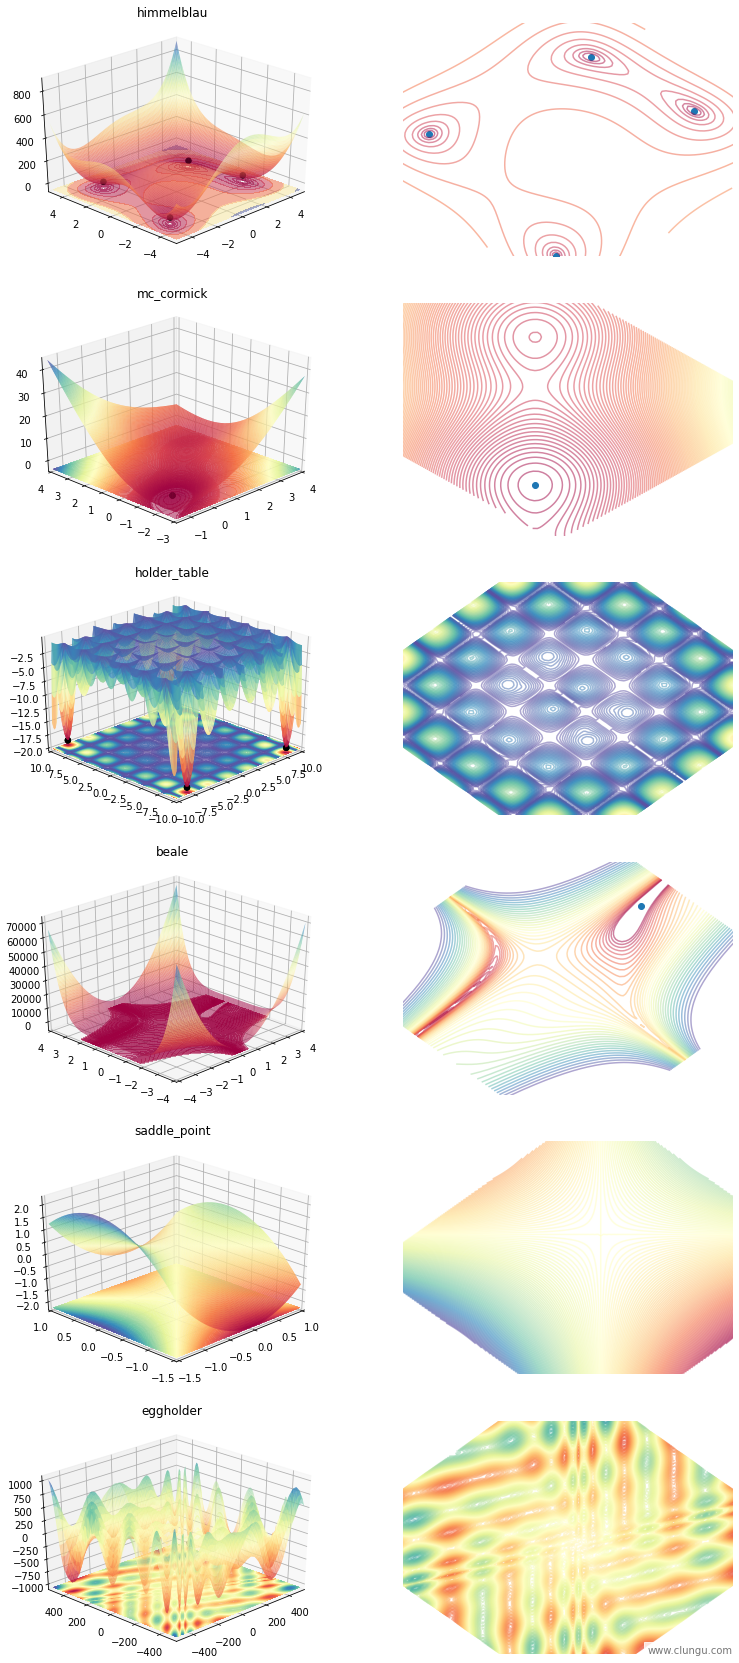

In [39]:
plot_all_functions(Function)

## SGD with "just right" `step_size`

From the animation above we've saw that SGD, did poorly compared with the others. This is a design weakenes, but a learning rate setting faliure as well.

Let's see how each optimizer fares, when compared to an SGD instance that has the "just right" learning rate set. 

In [58]:
from jax.experimental.optimizers import adam, adagrad, rmsprop, sgd, rmsprop_momentum, adamax, momentum, nesterov

animate(
    optimize_multi(himmelblau())\
        .using([
                (sgd(step_size=0.01), "sgd"),

                (adam(step_size=0.01), "adam"),
                (adagrad(step_size=0.01), "adagrad"),
                (adamax(step_size=0.1), "adamax"),
                (rmsprop(step_size=0.01), "rmsprop"),
        ])\
        .start_from([-1., -1.])\
        .tolist(),
    frames=100,
    use_flat_colors=True,
    interval=50
);

.....................................................................................................

It seems that SGD is really good at this function. 

Adamax did almost equally well but wasn't as stable as SGD was near the minimum.

You can't really see the trace of all the other optimizers because they are overimposed and follow roughly the same path.

My conclusion from this experiment is that SGD, when set up correctly surpasses the other optimizers. 

> A well tuned SGD beats all the other adaptive optimizers

## Beale on large `step_size`

Finding a good `step_size` (also known as `learning_rate`) is hard (or not trivial). Let's see how all of the optimizers fare when given a rather *large* (but not too large) `step_size`.

In [0]:
from jax.experimental.optimizers import adam, adagrad, rmsprop, sgd, rmsprop_momentum, adamax, sm3 

animate(
    optimize_multi(beale())\
        .using([
                (sgd(step_size=0.01), "sgd"),
                (adam(step_size=0.01), "adam"),
                (adagrad(step_size=0.01), "adagrad"),
                (rmsprop(step_size=0.01), "rmsprop"),
                (rmsprop_momentum(step_size=0.01), "rmsprop_momentum"),
                (adamax(step_size=0.01), "adamax"),
        ])\
        .start_from([-2., -2.])\
        .tolist(),
    frames=200,
    use_flat_colors=True,
    contour_log_scale=True,
    interval=50,
    angle=85
);

.........................................................................................................................................................................................................

SGD with 0.01 is off the charts and doesn't converges, while the others, even with a suboptimal step_size manage to run twards the minimum.

For example, here is the output of the first 5 update steps that SGD computes if we start from `(-2, -2)`. It's obvious that the `step_size` is too large as the optimisation moves from negative to positive and back, increasing the magnitude each time ending with a `-inf` value by it's fifth update. 

In [0]:
optimize(beale())\
    .using(sgd(step_size=0.01))\
    .start_from([-2., -2.])\
    .update(5)

([-2.0, 2.3874998092651367, -22429.189453125, 1.6297707243559544e+28, nan],
 [-2.0, 8.800000190734863, -18198.984375, 6.025792522646275e+28, -inf])

Let's finetune the SGD variants so we can still compare them with the others. Just in case, we will zoom out a bit so we can see the larger picture in case SGD goes off the charts again.

In [91]:
from jax.experimental.optimizers import adam, adagrad, rmsprop, sgd, rmsprop_momentum, adamax, sm3, momentum, nesterov, sm3

animate(
    optimize_multi(beale())\
        .using([
                (sgd(step_size=0.00001), "sgd"),
                (momentum(step_size=0.00001, mass=0.9), "momentum"),
                (nesterov(step_size=0.00001, mass=0.9), "nesterov"),

                (adam(step_size=0.1), "adam"),
                (adagrad(step_size=0.1), "adagrad"),
                (rmsprop(step_size=0.1), "rmsprop"),
                (rmsprop_momentum(step_size=0.1), "rmsprop_momentum"),
                (adamax(step_size=0.1), "adamax"),

        ])\
        .start_from([4., 3.])\
        .tolist(),
    frames=200,
    use_flat_colors=True,
    contour_log_scale=True,
    interval=50,
    angle=45,
    zoom_factor=-2
);

.........................................................................................................................................................................................................

Conclusions:
* rmsprop:
    * most stable of all

* rmsprop with momentum:
    * stumbles a bit but gets to the minimum quickly
    * when the minimum is reached, it follows a rather erratic path

* all sgd variants had to have the learning rate lowered to 0.00001 so not to explode so this comparision is rather misleading.


## What hapens when we have really large step sizes?

In the setup above we've assumed a "large but not too large" `step_size`, but what happens with an obvious *too large* value?

It's clear that the SGD variants need to have the right `step_size` set in order to work properlly, so we will ignore them in this experiment.

In [93]:
from jax.experimental.optimizers import adam, adagrad, rmsprop, sgd, rmsprop_momentum, adamax, sm3, momentum, nesterov, sm3

animate(
    optimize_multi(beale())\
        .using([
                (adam(step_size=0.5), "adam"),
                (adagrad(step_size=0.5), "adagrad"),
                (rmsprop(step_size=0.5), "rmsprop"),
                (rmsprop_momentum(step_size=0.5), "rmsprop_momentum"),
                (adamax(step_size=0.5), "adamax"),

        ])\
        .start_from([4., 3.])\
        .tolist(),
    frames=200,
    use_flat_colors=True,
    contour_log_scale=True,
    interval=50,
    angle=45,
    zoom_factor=-2
);

.........................................................................................................................................................................................................

Conclusions:
* rmsprop is still stable, except near the optimum value
* rmsprop *with momentum* is quite erratic but manages to get to the correct result
* ada* variants found a local minimum and settled there

## What happens when there are more than one minium and the step_size is too large?


In [99]:
animate(
    optimize_multi(himmelblau())\
        .using([
                # (sgd(step_size=0.5), "sgd"),
                # (momentum(step_size=0.5, mass=0.9), "momentum"),
                # (nesterov(step_size=0.5, mass=0.9), "nesterov"),

                (adam(step_size=0.5), "adam"),
                (adagrad(step_size=0.5), "adagrad"),
                (rmsprop(step_size=0.5), "rmsprop"),
                (rmsprop_momentum(step_size=0.5), "rmsprop_momentum"),
                (adamax(step_size=0.5), "adamax"),

        ])\
        .start_from([0., 0.])\
        .tolist(),
    frames=100,
    use_flat_colors=True,
    contour_log_scale=False,
    interval=50,
);

.....................................................................................................

* rmsprop found a solution quickly
* rmsprop *with momentum* shoots off with so much momentum, that soon reaches a really high point from which it falls back down, passes near the closest minimum, and goes on settling on the second most distant one. It's beggining was quite erratic but on a high dimensional optimisation (like a neural network, where the minimum is quite likely far away from the initialisation), the initial large momentum might not be a problem because it takes a few hundred batches (updates) to get near a minimum anyway. Also, in this instance, it takes a lot of steps.
* sgd, sgd with momentum, and sgd with nesterov fell off the grid so I removed them.
* adagrad fell smoothly to the nearest minimum but with some drag
* adamax, because of the momentum, **moved past** the minimum (while finding it!) and went to another minimum.
    * this means, that were we to start from a high point, close to one a local minimum, we will get ouf of it due to momentum.
* adam almost did the same as *adamax* but went for the closest minimum in the end.

## What happens to a really hard optimisation function when the learning rate is too high?

In [96]:
animate(
    optimize_multi(holder_table())\
        .using([
                (sgd(step_size=0.5), "sgd"),
                (momentum(step_size=0.5, mass=0.9), "momentum"),
                (nesterov(step_size=0.5, mass=0.9), "nesterov"),

                (adam(step_size=0.5), "adam"),
                (adagrad(step_size=0.5), "adagrad"),
                (rmsprop(step_size=0.5), "rmsprop"),
                (rmsprop_momentum(step_size=0.5), "rmsprop_momentum"),
                (adamax(step_size=0.5), "adamax"),

        ])\
        .start_from([-1., -1.])\
        .tolist(),
    frames=20,
    use_flat_colors=True,
    contour_log_scale=False,
    interval=50,
);

.....................

Basically all, except rmsprop *with momentum* settle to a local minimum while it diverges off the chart

## Who can solve holter_table, if we tune the step_size correctly?

In [120]:
animate(
    optimize_multi(holder_table())\
        .using([
                (rmsprop_momentum(step_size=0.47), "rmsprop_momentum"),
        ])\
        .start_from([-1., -1.])\
        .tolist(),
    frames=15,
    use_flat_colors=True,
    contour_log_scale=False,
    interval=50,
);

................

In [108]:
animate(
    optimize_multi(holder_table())\
        .using([
            (momentum(step_size=0.4, mass=0.9), "momentum"),
        ])\
        .start_from([-1., -1.])\
        .tolist(),
    frames=20,
    use_flat_colors=True,
    contour_log_scale=False,
    interval=50,
);

.....................

I can't seem to find any good paramters for either SGD with momentum or rmsprop with momentum. Since these are the ones that exhibit the stronger ability to escape from a local minimum, due to their large momentum factor, I must conclude that this function may not be possible to be optimized with any of these optimizers.

This is a bit troubling find, since, if the objective function of a neural network may resemble such a shape, then, only by chance of a random initialisation we could expect to optimize it to a local minimum with these optimizers.. 

So `holter_table` seems not to be solvable if we start from [-1, -1]

Let's try another function with lots of ravines and see if on that, any of these two can find anything usefull.

In [119]:
animate(
    optimize_multi(eggholder())\
        .using([
                (rmsprop_momentum(step_size=0.5), "rmsprop_momentum"),
        ])\
        .start_from([0., 0.])\
        .tolist(),
    frames=20,
    use_flat_colors=True,
    contour_log_scale=False,
    interval=50,
    angle=45-90, 
    zoom_factor=-0.5
);

.....................

With RMSprop, if we happen to pe initialized into a local plateau, the momentum won't help us escape it. Let's try initializing from a diffrent place, on the edge of a steeper ravine.

In [122]:
animate(
    optimize_multi(eggholder())\
        .using([
                (rmsprop_momentum(step_size=0.5), "rmsprop_momentum"),
        ])\
        .start_from([-200., 200.])\
        .tolist(),
    frames=200,
    use_flat_colors=True,
    contour_log_scale=False,
    interval=50,
    angle=45-90, 
    zoom_factor=-0.5
);

.........................................................................................................................................................................................................

I must conclude again, that functions with lots of local minima cannot be optimized with any of these optimizers, **if using a single `step_size` value**!.

I assume that augmenting the oprimizer with a learning rate schedulling might be usefull in solving these type of functions. 

I plan on exploring this assumptions in a future blog post, stay tunned!